In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")

## 선그래프

In [9]:
### 월별 해파리 발견율 선그래프 그리기
# 전처리된 엑셀파일을 불러와서 피봇 생성

file_path = "./해애파리.xlsx"
line = pd.read_excel(file_path)
line_pivot = line.pivot_table(values="발견율(%)",
                        index="조사일시",
                        columns="해파리종류",
                        aggfunc="mean")
line_pivot

해파리종류,관해파리,기수식용해파리,꽃모자갈퀴손해파리,꽃모자해파리,노무라입깃해파리,두빛보름달해파리,보름달물해파리,살파류(척삭동물),야광원양해파리,오이빗해파리,유령해파리,작은부레관해파리,작은상자해파리,커튼원양해파리,투구빗해파리,평면해파리,푸른우산관해파리
조사일시,,,,,,,,,,,,,,,,,
2020-05-01,NaN,NaN,NaN,NaN,0.48,1.92,5.29,NaN,NaN,NaN,NaN,NaN,0.48,NaN,NaN,NaN,NaN
2020-05-08,NaN,NaN,NaN,NaN,0.88,1.77,10.18,NaN,NaN,NaN,0.44,NaN,0.44,0.44,NaN,NaN,NaN
2020-05-15,NaN,NaN,NaN,NaN,2.36,0.47,11.79,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-22,NaN,NaN,NaN,NaN,2.31,NaN,19.65,NaN,NaN,NaN,2.36,NaN,NaN,2.36,NaN,NaN,NaN
2020-05-29,NaN,0.41,NaN,NaN,2.06,0.41,17.28,0.41,NaN,NaN,0.82,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,NaN,NaN,NaN,NaN,3.60,0.50,3.60,0.50,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-11,NaN,NaN,NaN,NaN,5.10,1.50,3.10,1.00,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,5.20,1.00,2.60,0.50,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN,NaN


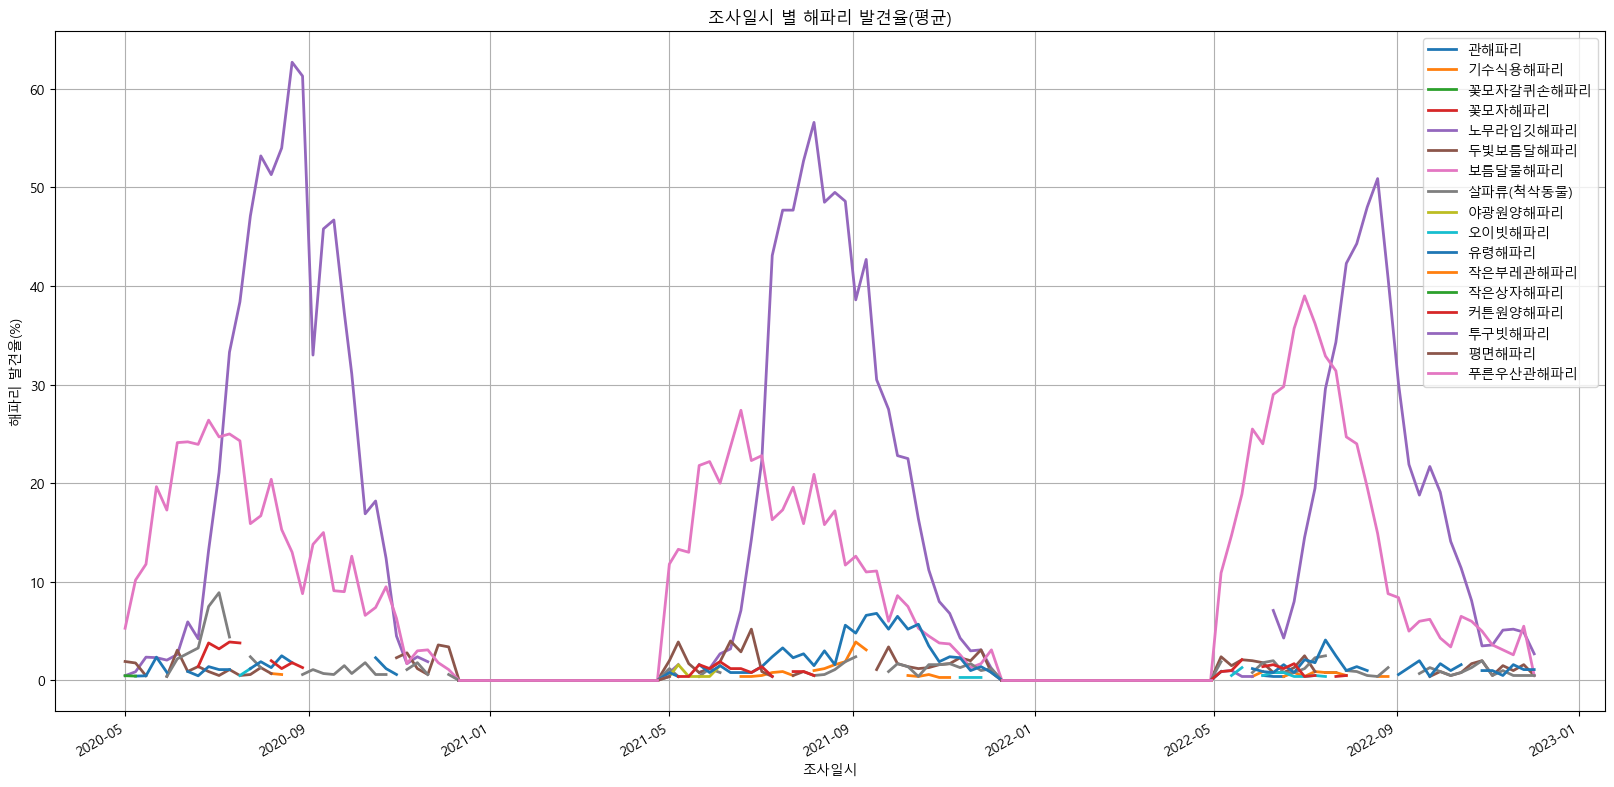

In [10]:
# 그래프 크기
plt.rcParams["figure.figsize"] = (20,10)

# 선 두께
plt.rcParams["lines.linewidth"] = 2

# 그래프 그리기
line_pivot.plot()

plt.title("조사일시 별 해파리 발견율(평균)")
plt.ylabel("해파리 발견율(%)")

# 모눈 표시하기
plt.grid()

# 범례 위치 변경
plt.legend(loc="upper right")
plt.show()

## 히트맵

In [3]:
df_jf = pd.read_excel("./해파리total.xlsx")
df_jf["조사일시(월)"] = df_jf["조사일시"].dt.strftime("%Y-%m")

In [4]:
df_1 = df_jf.copy()

In [5]:
sample = df_1[df_1["독성"] == "강독성"]
sample.pivot_table(values="발견율(%)",
                    index="해파리종류",
                    aggfunc="mean")

,발견율(%)
해파리종류,
노무라입깃해파리,34.845727
두빛보름달해파리,2.074158
야광원양해파리,0.950667
유령해파리,3.042007
커튼원양해파리,1.850222


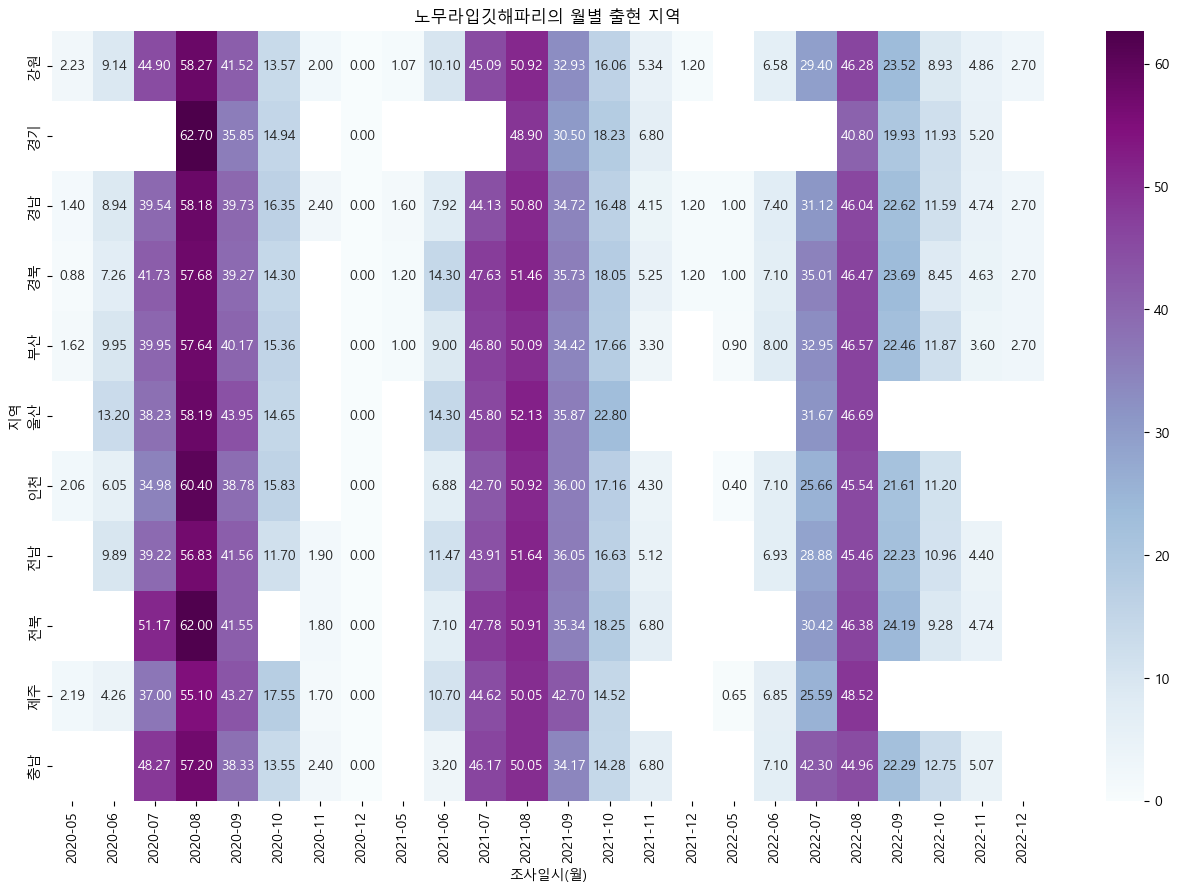

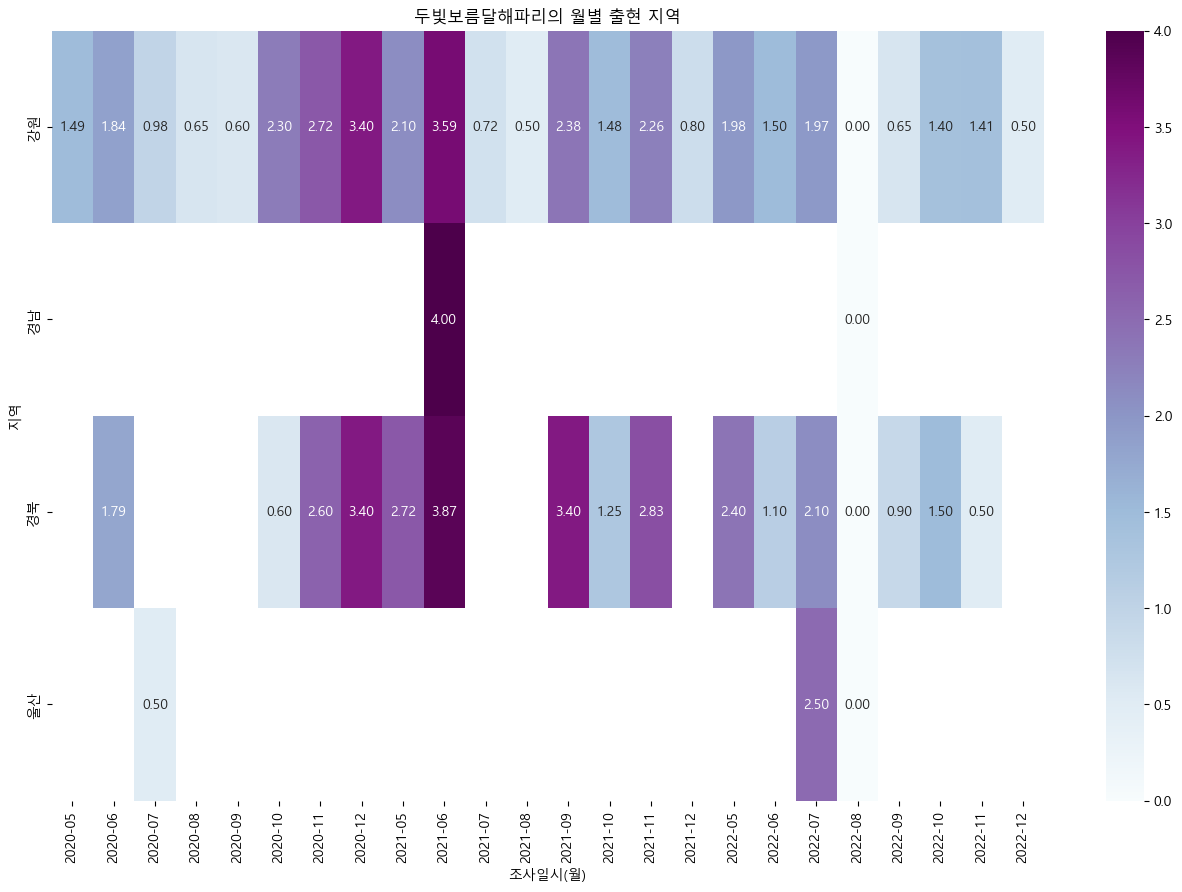

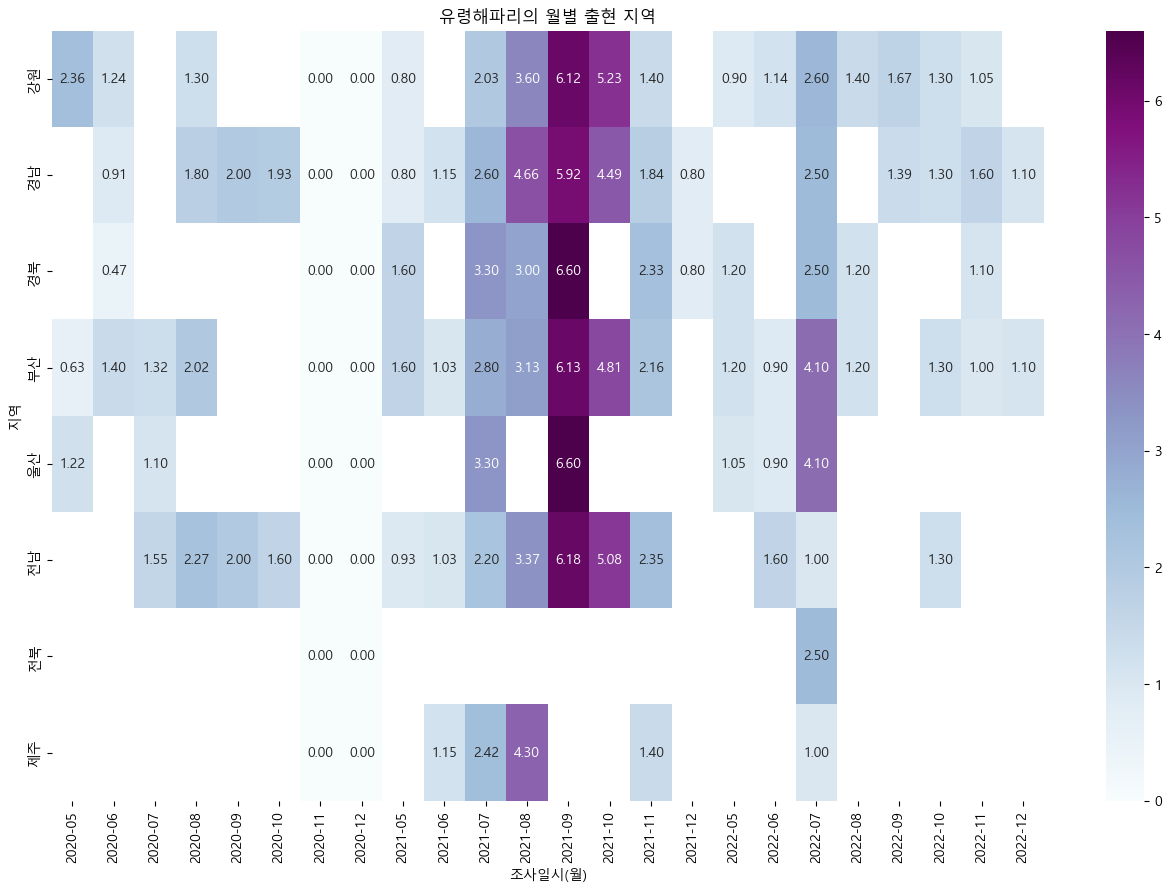

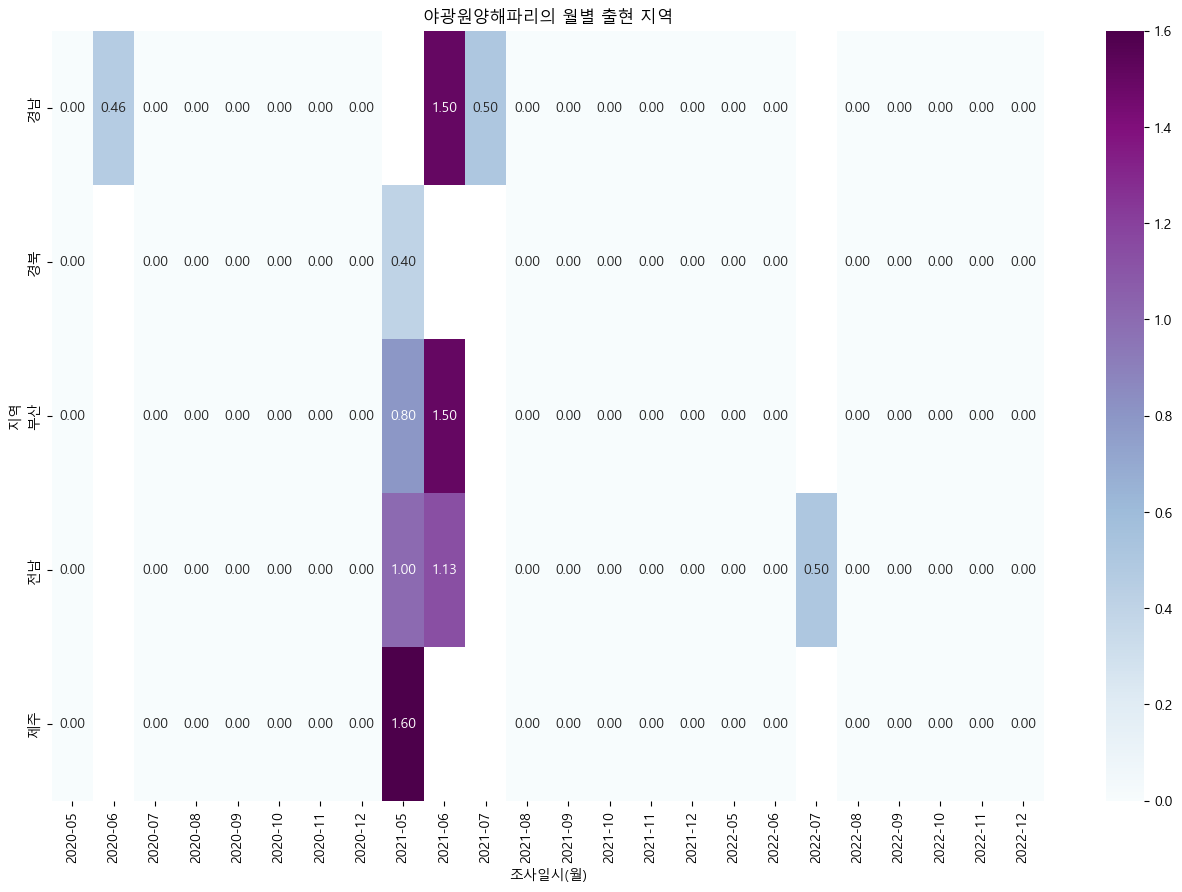

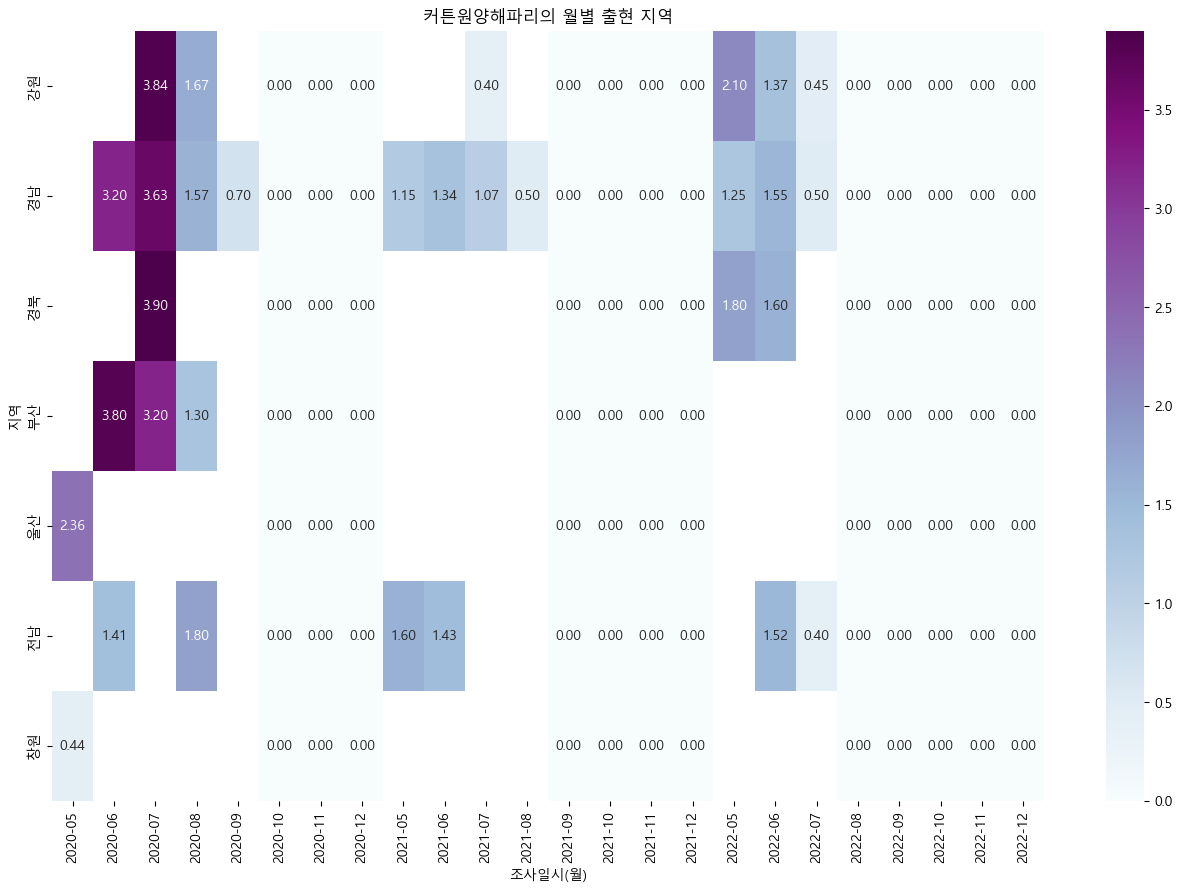

In [7]:
### 해파리 raw 자료 불러들이기
df_jf = pd.read_excel("./해파리total.xlsx")

### 새로운 데이터프레임 생성
# - 컬럼 추가 : 조사일시(월) = 조사일시에서 "년-월"을 뽑아냄
df_jf["조사일시(월)"] = df_jf["조사일시"].dt.strftime("%Y-%m")

"""-------------<강독성 해파리 히트맵 그리기>-----------------
- 강독성 해파리(4) : 노무라입깃해파리, 두빛보름달해파리, 유령해파리, 커튼원양해파리
- 모든 조사(월)에 해당되는 데이터 포함시킴
-- 관측되지 않는 조사일시(월)을 0으로 표시"""

### 해파리 리스트
type_list = ["노무라입깃해파리", "두빛보름달해파리", "유령해파리", "야광원양해파리", "커튼원양해파리"]

### 기준 조사일시(월) 고윳값 추출
lst_1 = df_1["조사일시(월)"].unique()

### 피벗테이블을 위한 해파리별 데이터 프레임 설정
for val in type_list:
    # 해파리 종류별 "발견율(%)", "지역", "조사일시(월)" 데이터프레임
    df_temp = df_1[df_1["해파리종류"]==val][["발견율(%)", "지역", "조사일시(월)"]]
    
    # 기준 조사일시(월)에 없는 데이터 추출
    lst_2 = df_temp["조사일시(월)"].unique()
    lst_x = list(set(lst_1)-set(lst_2))
    
    # 지역 고윳값 추출
    sido_temp = df_temp["지역"].unique()
    
    # 0으로 처리할 데이터프레임 생성
    df_temp2 = pd.DataFrame()
    for v1 in sido_temp :
        df_temp2["지역"] = [v1]
        for v2 in lst_x :
            df_temp2["조사일시(월)"] = [v2]
            df_temp2["발견율(%)"] = 0
            
            # 해파리별 데이터 프레임에 통합
            df_temp = pd.concat([df_temp, df_temp2], ignore_index=True)

    ### 피벗테이블 생성
    df_pivot = df_temp.pivot_table(values="발견율(%)",
                              index="지역",
                              columns= "조사일시(월)",
                              aggfunc="mean")

    ### 히트맵 그리기
    #그래프 시작점
    plt.figure(figsize=(16,10))
    
    sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="BuPu")

    plt.title("{}의 월별 출현 지역".format(val))

    plt.show()